Import `numpy` and `matplotlib`, set all figures to be inline, import `flopy.modflow` and `flopy.utils`.

In [1]:
%matplotlib inline
import os
import platform
import numpy as np
import matplotlib.pyplot as plt

import flopy

In [2]:
#Set name of MODFLOW exe
#  assumes executable is in users path statement
exepth = os.path.join('..', 'autotest', 'temp')
exe_name = 'mf2005_1.12.00'
mfexe = os.path.abspath(os.path.join(exepth, exe_name))

modelpth = os.path.join('..', 'test-dev', 'swi2ex4')
modelname = 'swiex4_s1'

#### Load and run the model

In [3]:
ml = flopy.modflow.Modflow.load(modelname+'.nam', model_ws=modelpth, exe_name=mfexe)
ml.run_model(silent=True)

2 6 (2, 3)


(True, [])

In [4]:
ml.check();


swiex4_s1 MODEL DATA VALIDATION SUMMARY:
  No errors or warnings encountered.

  Checks that passed:
    Compatible solver package
    Unit number conflicts
    DIS package: zero or negative thickness
    DIS package: thin cells (less than checker threshold of 1.0)
    DIS package: nan values in top array
    DIS package: nan values in bottom array
    BAS6 package: isolated cells in ibound array
    BAS6 package: Not a number
    GHB package: BC indices valid
    GHB package: not a number (Nan) entries
    GHB package: BC in inactive cells
    GHB package: BC elevation below cell bottom
    LPF package: zero or negative vertical hydraulic conductivity values
    LPF package: zero or negative horizontal hydraulic conductivity values
    LPF package: negative horizontal anisotropy values
    LPF package: vertical hydraulic conductivity values below checker threshold of 1e-11
    LPF package: vertical hydraulic conductivity values above checker threshold of 100000.0
    LPF package: hor

In [5]:
ml.wel.stress_period_data[0]

rec.array([(0, 30, 35, 0.0), (1, 30, 35, 0.0)], 
          dtype=[('k', '<i8'), ('i', '<i8'), ('j', '<i8'), ('flux', '<f4')])

In [6]:
ncol = ml.ncol
nrow = ml.nrow
nlay = ml.nlay

Specify the cell size along the rows (`delr`) and along the columns (`delc`) and the top and bottom of the aquifer for the `DIS` package. 

In [7]:
# dis data
delr, delc = ml.dis.delr.array, ml.dis.delc.array
botm = np.array([-10., -30., -50.])

Load the simulation 1 `ZETA` data and `ZETA` observations.

In [8]:
# read base model zeta
zfile = flopy.utils.CellBudgetFile(os.path.join(ml.model_ws, modelname+'.zta'))
kstpkper = zfile.get_kstpkper()
zeta = []
for kk in kstpkper:
    zeta.append(zfile.get_data(kstpkper=kk, text='ZETASRF  1')[0])
zeta = np.array(zeta)
# read swi obs
zobs = np.genfromtxt(os.path.join(ml.model_ws, modelname+'.zobs'), names=True)

Create arrays for the x-coordinates and the output years

In [9]:
x = np.linspace(-1500, 1500, 61)
xcell = np.linspace(-1500, 1500, 61) + delr[0] / 2.
xedge = np.linspace(-1525, 1525, 62)
years = [40, 80, 120, 160, 200, 6, 12, 18, 24, 30]

Define figure dimensions and colors used for plotting `ZETA` surfaces

In [10]:
# figure dimensions
fwid, fhgt = 8., 5.5
flft, frgt, fbot, ftop = 0.125, 0.95, 0.125, 0.925

# line color definition
icolor = 5
colormap = plt.cm.jet  #winter
cc = []
cr = np.linspace(0.9, 0.0, icolor)
for idx in cr:
    cc.append(colormap(idx))

Recreate **Figure 9** from the SWI2 documentation (http://pubs.usgs.gov/tm/6a46/).

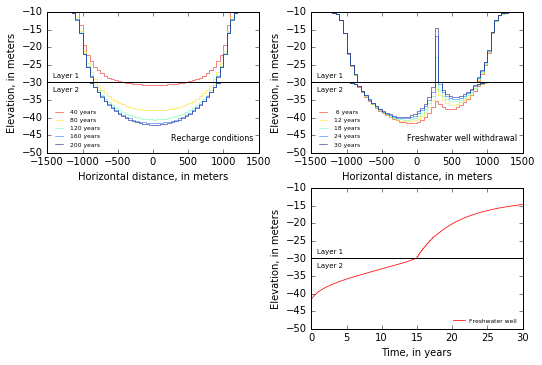

In [11]:
plt.rcParams.update({'legend.fontsize': 6, 'legend.frameon' : False})
fig = plt.figure(figsize=(fwid, fhgt), facecolor='w')
fig.subplots_adjust(wspace=0.25, hspace=0.25, left=flft, right=frgt, bottom=fbot, top=ftop)
# first plot
ax = fig.add_subplot(2, 2, 1)
# axes limits
ax.set_xlim(-1500, 1500)
ax.set_ylim(-50, -10)
for idx in range(5):
    # layer 1
    ax.plot(xcell, zeta[idx, 0, 30, :], drawstyle='steps-mid', 
            linewidth=0.5, color=cc[idx], label='{:2d} years'.format(years[idx]))
    # layer 2
    ax.plot(xcell, zeta[idx, 1, 30, :], drawstyle='steps-mid',
            linewidth=0.5, color=cc[idx], label='_None')
ax.plot([-1500, 1500], [-30, -30], color='k', linewidth=1.0)
# legend
plt.legend(loc='lower left')
# axes labels and text
ax.set_xlabel('Horizontal distance, in meters')
ax.set_ylabel('Elevation, in meters')
ax.text(0.025, .55, 'Layer 1', transform=ax.transAxes, va='center', ha='left', size='7')
ax.text(0.025, .45, 'Layer 2', transform=ax.transAxes, va='center', ha='left', size='7')
ax.text(0.975, .1, 'Recharge conditions', transform=ax.transAxes, va='center', ha='right', size='8')

# second plot
ax = fig.add_subplot(2, 2, 2)
# axes limits
ax.set_xlim(-1500, 1500)
ax.set_ylim(-50, -10)
for idx in range(5, len(years)):
    # layer 1
    ax.plot(xcell, zeta[idx, 0, 30, :], drawstyle='steps-mid', 
            linewidth=0.5, color=cc[idx-5], label='{:2d} years'.format(years[idx]))
    # layer 2
    ax.plot(xcell, zeta[idx, 1, 30, :], drawstyle='steps-mid',
            linewidth=0.5, color=cc[idx-5], label='_None')
ax.plot([-1500, 1500], [-30, -30], color='k', linewidth=1.0)
# legend
plt.legend(loc='lower left')
# axes labels and text
ax.set_xlabel('Horizontal distance, in meters')
ax.set_ylabel('Elevation, in meters')
ax.text(0.025, .55, 'Layer 1', transform=ax.transAxes, va='center', ha='left', size='7')
ax.text(0.025, .45, 'Layer 2', transform=ax.transAxes, va='center', ha='left', size='7')
ax.text(0.975, .1, 'Freshwater well withdrawal', transform=ax.transAxes, va='center', ha='right', size='8')

# fourth plot
ax = fig.add_subplot(2, 2, 4)
# axes limits
ax.set_xlim(0, 30)
ax.set_ylim(-50, -10)
t = zobs['TOTIM'][999:] / 365 - 200.
tz2 = zobs['layer1_001'][999:]
for i in range(len(t)):
    if zobs['layer2_001'][i+999] < -30. - 0.1:
        tz2[i] = zobs['layer2_001'][i+999]
ax.plot(t, tz2, linestyle='solid', color='r', linewidth=0.75, label='Freshwater well')
ax.plot([0, 30], [-30, -30], 'k', linewidth=1.0, label='_None')
# legend
leg = plt.legend(loc='lower right', numpoints=1)
# axes labels and text
ax.set_xlabel('Time, in years')
ax.set_ylabel('Elevation, in meters')
ax.text(0.025, .55, 'Layer 1', transform=ax.transAxes, va='center', ha='left', size='7')
ax.text(0.025, .45, 'Layer 2', transform=ax.transAxes, va='center', ha='left', size='7');

Use `ModelCrossSection` plotting class and `plot_fill_between()` method to fill between zeta surfaces.

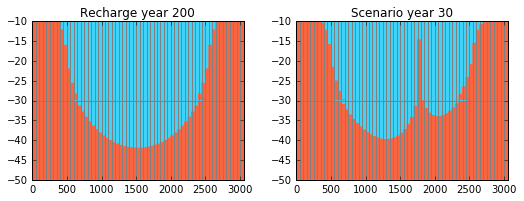

In [12]:
fig = plt.figure(figsize=(fwid, fhgt/2))
fig.subplots_adjust(wspace=0.25, hspace=0.25, left=flft, right=frgt, bottom=fbot, top=ftop)

colors = ['#40d3f7', '#F76541']

ax = fig.add_subplot(1, 2, 1)
modelxsect = flopy.plot.ModelCrossSection(model=ml, line={'Row': 30}, 
                                  extent=(0, 3050, -50, -10))
modelxsect.plot_fill_between(zeta[4, :, :, :], colors=colors, ax=ax,
                              edgecolors='none')
linecollection = modelxsect.plot_grid(ax=ax)
ax.set_title('Recharge year {}'.format(years[4]));

ax = fig.add_subplot(1, 2, 2)
ax.set_xlim(0, 3050)
ax.set_ylim(-50, -10)
modelxsect.plot_fill_between(zeta[-1, :, :, :], colors=colors, ax=ax)
linecollection = modelxsect.plot_grid(ax=ax)
ax.set_title('Scenario year {}'.format(years[-1]));